In [1]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("FaceDetection")
y_train = list(int(y) for y in y_train)
y_test = list(int(y) for y in y_test)

In [4]:
import iisignature as sig
from sklearn.linear_model import LogisticRegression
arr = []
arr_test = []
for i in range(len(X_train)):
    arr.append(sig.sig(X_train[i], 2))
for i in range(len(X_test)):
    arr_test.append(sig.sig(X_test[i], 2))

C:\Users\huawei\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


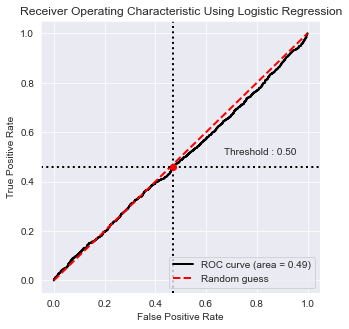

score is 0.49432463110102154


In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(arr, y_train)
y_pred = clf.predict_proba(arr_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(arr_test, y_test)
print("score is " + str(score))

In [7]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(arr, y_train)
    print(knn_clf.score(arr_test,y_test))

0.49943246311010214
0.5082292849035187
0.5107832009080591
0.5153234960272418
0.4977298524404086
0.5079455164585698
0.5014188422247446
0.5019863791146425
0.4974460839954597


In [8]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("Libras")
y_train = list(int(y) for y in y_train)
y_test = list(int(y) for y in y_test)

In [12]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
for i in range(1,20):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.8722222222222222
0.8388888888888889
0.85
0.8388888888888889
0.8055555555555556
0.7888888888888889
0.7777777777777778
0.7222222222222222
0.6944444444444444
0.6611111111111111
0.6277777777777778
0.55
0.5555555555555556
0.5333333333333333
0.5166666666666667
0.5388888888888889
0.5222222222222223
0.5111111111111111
0.5055555555555555


In [13]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7055555555555556


In [32]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("SelfRegulationSCP1")

In [63]:
print(np.cumsum((X_train)[0],axis=0))
#return a list with length = time 
#and each element in the list is ith term of the cumulative sum of 6-dimensional

    


[[2.300000e+01 1.903000e+01 3.219000e+01 4.366000e+01 3.072000e+01
  3.909000e+01]
 [4.466000e+01 3.822000e+01 6.900000e+01 8.488000e+01 6.253000e+01
  7.862000e+01]
 [6.550000e+01 5.972000e+01 1.091600e+02 1.245700e+02 9.422000e+01
  1.192100e+02]
 ...
 [2.639947e+04 2.641933e+04 2.646384e+04 2.647692e+04 2.653900e+04
  2.658948e+04]
 [2.642209e+04 2.644611e+04 2.649837e+04 2.652776e+04 2.658269e+04
  2.663423e+04]
 [2.644359e+04 2.647505e+04 2.653549e+04 2.657851e+04 2.662457e+04
  2.668042e+04]]


In [47]:
import iisignature as sig
from sklearn.linear_model import LogisticRegression
arr = []
arr_test = []
for i in range(len(X_train)):
    arr.append(sig.sig(X_train[i], 2))
for i in range(len(X_test)):
    arr_test.append(sig.sig(X_test[i], 2))
    
y_train_1 = []
arr_class0 = []
arr_class1 = []
for i in range(len(y_train)):
    if y_train[i] == "negativity":
        y_train_1.append(0)
        arr_class0.append(arr[i])
    else:
        y_train_1.append(1)
        arr_class1.append(arr[i])
        
arr_test_class0 = []
arr_test_class1 = []
y_test_1 = []
for i in range(len(y_test)):
    if y_test[i] == "negativity":
        y_test_1.append(0)
        arr_test_class0.append(arr_test[i])
    else:
        y_test_1.append(1)
        arr_test_class1.append(arr_test[i])

C:\Users\huawei\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


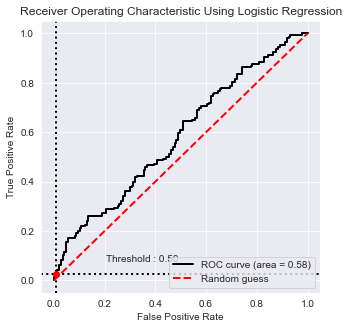

score is 0.5119453924914675


In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(arr, y_train_1)
y_pred = clf.predict_proba(arr_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test_1, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(arr_test, y_test_1)
print("score is " + str(score))

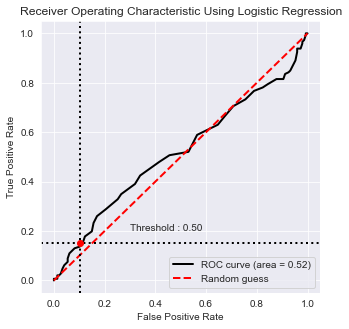

score is 0.0


C:\Users\huawei\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(arr, y_train_1)
y_pred = clf.predict_proba(arr_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test_1, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(arr_test, y_test)
print("score is " + str(score))